In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 

from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
data = pd.read_csv('data/combined_data.csv', index_col=0)
data.sample(3)

,text,sentiment
1804,This place is overpriced not consistent with t...,0
1311,All the bread is made in-house!,1
960,I exchanged the sony ericson z500a for this an...,1


In [4]:
sentences = data['text'].tolist()
labels = data['sentiment'].tolist()

In [5]:
vocab_size = 1000

In [6]:
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length = 5)

In [7]:
tokenizer.vocab_size

999

In [8]:
print(sentences[5])

I have to jiggle the plug to get it to line up right to get decent volume.


In [9]:
encoded = tokenizer.encode(sentences[5])
print(encoded)

[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [10]:
for en in encoded:
    print(tokenizer.decode([en]), en)

I  4
have  31
to  6
j 849
ig 162
gl 450
e  12
the  1
pl 600
ug 438
  775
to  6
get  175
it  14
to  6
li 55
ne  213
up  159
right 474
  775
to  6
get  175
dec 614
ent  380
vo 295
lu 148
me 72
. 789


## Replace sentence data with encoded subwords

In [11]:
for i ,sentence in enumerate(sentences):
    sentences[i] = tokenizer.encode(sentence)

In [12]:
sentences[1]

[625, 677, 626, 274, 380, 633, 148, 844, 789]

## Pre-Processing

In [13]:
max_length =50


In [14]:
# pad sequnces
padded_sequences = pad_sequences(sentences, maxlen=max_length, padding='post', truncating='post')

padded_sequences[1]

array([625, 677, 626, 274, 380, 633, 148, 844, 789,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Split into test and train data

In [15]:
split_index = int(len(padded_sequences)*0.8)

In [16]:
train_seq = padded_sequences[0: split_index]
test_seq = padded_sequences[split_index: ]

In [17]:
train_label = labels[0: split_index]
test_label = labels[split_index: ]

In [18]:
train_label = np.array(train_label)
test_label = np.array(test_label)

## Write Generic method to train model and output results

In [19]:
EPOCHS = 30
    
def fit_model_show_results(model):
    history = fit_model(model)
    
    plot_results(history)
    

def plot_results(history):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    x_rng = range(0, EPOCHS)
    
    plt.plot(x_rng, loss, label ='Training Loss')
    plt.plot(x_rng, val_loss, label ='Validation Loss')

    plt.legend()
    plt.show()
    
    plt.plot(x_rng, acc, label ='Training Accuracy')
    plt.plot(x_rng, val_accuracy, label ='Validation Accuracy')

    plt.legend()
    plt.show()
    
    
def fit_model(model):
    
    model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
             metrics=['accuracy'], 
             optimizer='adam')
    

    history = model.fit(train_seq, 
         train_label, 
         epochs=EPOCHS, 
         validation_data=(test_seq, test_label)           
         )
    
    return history
    

## Create Model Using Embedding

In [20]:
embedding_dim = 16

In [21]:
l0 = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length)
l1 = tf.keras.layers.GlobalAveragePooling1D()
l2 = tf.keras.layers.Dense(units=6, activation ='relu')
l3 = tf.keras.layers.Dense(units =2, activation='softmax')

In [22]:
model = tf.keras.Sequential([l0, l1, l2, l3])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 16,116
Trainable params: 16,116
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5330 - val_loss: 0.7012 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 951us/step - loss: 0.6858 - accuracy: 0.5336 - val_loss: 0.6988 - val_accuracy: 0.4511
Epoch 3/30
50/50 [==============================] - 0s 948us/step - loss: 0.6781 - accuracy: 0.5675 - val_loss: 0.6950 - val_accuracy: 0.4887
Epoch 4/30
50/50 [==============================] - 0s 959us/step - loss: 0.6656 - accuracy: 0.6033 - val_loss: 0.6878 - val_accuracy: 0.5063
Epoch 5/30
50/50 [==============================] - 0s 934us/step - loss: 0.6453 - accuracy: 0.6704 - val_loss: 0.6622 - val_accuracy: 0.6140
Epoch 6/30
50/50 [==============================] - 0s 928us/step - loss: 0.6145 - accuracy: 0.7257 - val_loss: 0.6521 - val_accuracy: 0.5789
Epoch 7/30
50/50 [==============================] - 0s 926us/step - loss: 0.5768 - accuracy: 0.7627 - val_loss: 0.6104 - val_accuracy: 0.7068
Epoch 8/

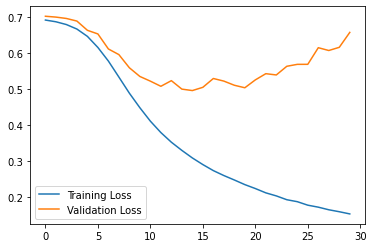

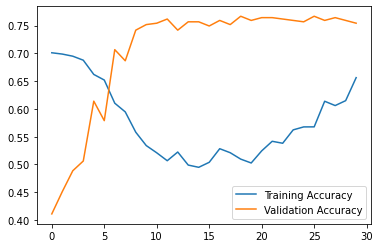

In [23]:
fit_model_show_results(model)

## Add a LSTM Layer

In [24]:
l0 = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length)
l1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim))
l2 = tf.keras.layers.Dense(units=6, activation ='relu')
l3 = tf.keras.layers.Dense(units =2, activation='softmax')

model_bi_lstm = tf.keras.Sequential([l0, l1, l2, l3])
model_bi_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                4224      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total params: 20,436
Trainable params: 20,436
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
50/50 [==============================] - 1s 24ms/step - loss: 0.6931 - accuracy: 0.5122 - val_loss: 0.6949 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 1s 15ms/step - loss: 0.6909 - accuracy: 0.5788 - val_loss: 0.6853 - val_accuracy: 0.6466
Epoch 3/30
50/50 [==============================] - 1s 15ms/step - loss: 0.6489 - accuracy: 0.6993 - val_loss: 0.6017 - val_accuracy: 0.7093
Epoch 4/30
50/50 [==============================] - 1s 15ms/step - loss: 0.5431 - accuracy: 0.7991 - val_loss: 0.5956 - val_accuracy: 0.7118
Epoch 5/30
50/50 [==============================] - 1s 15ms/step - loss: 0.3716 - accuracy: 0.8694 - val_loss: 0.5704 - val_accuracy: 0.7393
Epoch 6/30
50/50 [==============================] - 1s 16ms/step - loss: 0.2571 - accuracy: 0.8958 - val_loss: 0.5901 - val_accuracy: 0.7644
Epoch 7/30
50/50 [==============================] - 1s 17ms/step - loss: 0.1794 - accuracy: 0.9404 - val_loss: 0.6697 - val_accuracy: 0.7644
Epoch 8/30
50

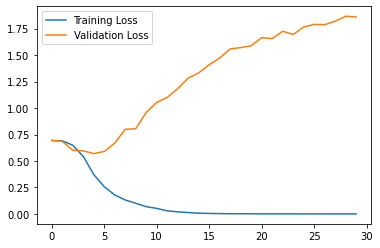

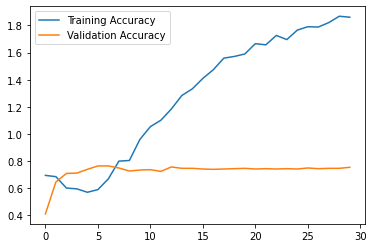

In [25]:
fit_model_show_results(model_bi_lstm)

## Adding 2 LSTM Layers

In [26]:
l0 = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length)
l1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True))
l2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim))
l3 = tf.keras.layers.Dense(units=6, activation ='relu')
l4 = tf.keras.layers.Dense(units =2, activation='softmax')

model_2_bi_lstm = tf.keras.Sequential([l0, l1, l2, l3, l4])
model_2_bi_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 14        
Total params: 26,708
Trainable params: 26,708
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
50/50 [==============================] - 3s 52ms/step - loss: 0.6889 - accuracy: 0.5512 - val_loss: 0.6807 - val_accuracy: 0.6040
Epoch 2/30
50/50 [==============================] - 2s 33ms/step - loss: 0.5774 - accuracy: 0.7232 - val_loss: 0.5671 - val_accuracy: 0.7143
Epoch 3/30
50/50 [==============================] - 2s 33ms/step - loss: 0.3613 - accuracy: 0.8544 - val_loss: 0.4949 - val_accuracy: 0.7794
Epoch 4/30
50/50 [==============================] - 2s 33ms/step - loss: 0.2692 - accuracy: 0.9027 - val_loss: 0.5964 - val_accuracy: 0.7594
Epoch 5/30
50/50 [==============================] - 2s 33ms/step - loss: 0.2243 - accuracy: 0.9278 - val_loss: 0.5869 - val_accuracy: 0.7794
Epoch 6/30
50/50 [==============================] - 2s 33ms/step - loss: 0.1812 - accuracy: 0.9435 - val_loss: 0.8222 - val_accuracy: 0.7343
Epoch 7/30
50/50 [==============================] - 2s 33ms/step - loss: 0.1697 - accuracy: 0.9485 - val_loss: 0.6679 - val_accuracy: 0.7644
Epoch 8/30
50

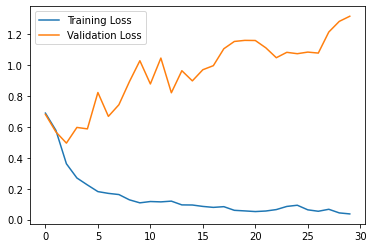

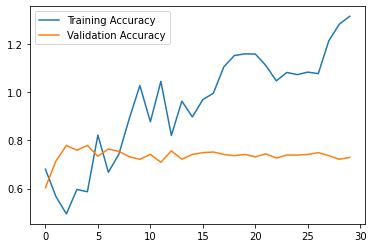

In [27]:
fit_model_show_results(model_2_bi_lstm)

## Compare Prediction of all Models

In [28]:
def predict_reviews(model, fake_reviews):
    
    fake_reviews_temp = fake_reviews.copy()
    for i ,sentence in enumerate(fake_reviews):
        fake_reviews_temp[i] = tokenizer.encode(sentence)

    fake_pd_seq = pad_sequences(fake_reviews_temp, maxlen = max_length, padding='post', truncating='post')
    
    classes = model.predict(fake_pd_seq)

    for c in np.arange(0, len(fake_pd_seq)):
        cl = ('-ve' if np.argmax(classes[c]) == 0 else '+ve')

        print(fake_reviews[c] , ' ==> ', cl )
        

In [29]:
fake_reviews=['OMG, what a horrible juice!', 
             'I thought i wasted money but this turns out to be a great deal!', 
             'Terrible place, terrible tacos!', 
             'Burger to die for!', 
             'Lovely flowers, thank you!',
             'quick service, elegenat ambiance and delicious food']


In [30]:
print('Embedding Model==> \n')
predict_reviews(model, fake_reviews)

Embedding Model==> 

OMG, what a horrible juice!  ==>  -ve
I thought i wasted money but this turns out to be a great deal!  ==>  +ve
Terrible place, terrible tacos!  ==>  -ve
Burger to die for!  ==>  +ve
Lovely flowers, thank you!  ==>  +ve
quick service, elegenat ambiance and delicious food  ==>  +ve


In [31]:
print('LSTM==> \n')
predict_reviews(model_bi_lstm, fake_reviews)

LSTM==> 

OMG, what a horrible juice!  ==>  -ve
I thought i wasted money but this turns out to be a great deal!  ==>  -ve
Terrible place, terrible tacos!  ==>  -ve
Burger to die for!  ==>  -ve
Lovely flowers, thank you!  ==>  +ve
quick service, elegenat ambiance and delicious food  ==>  +ve


In [32]:
print('LSTM 2 layers==> \n')
predict_reviews(model_2_bi_lstm, fake_reviews)

LSTM 2 layers==> 

OMG, what a horrible juice!  ==>  -ve
I thought i wasted money but this turns out to be a great deal!  ==>  +ve
Terrible place, terrible tacos!  ==>  -ve
Burger to die for!  ==>  +ve
Lovely flowers, thank you!  ==>  -ve
quick service, elegenat ambiance and delicious food  ==>  +ve


## Visualize the Network

In [33]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [34]:
# import io

# # Write out the embedding vectors and metadata
# out_v = io.open('vecs_sub.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta_sub.tsv', 'w', encoding='utf-8')

# for word_num in range(0, vocab_size - 1):
#     word = tokenizer.decode([word_num])
#     embeddings = weights[word_num]
#     out_m.write(word + "\n")
#     out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
# out_v.close()
# out_m.close()